In [1]:
import pandas as pd
import nltk
import string
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk import word_tokenize
from gensim.models import Word2Vec as w2v
from sklearn.decomposition import PCA

In [2]:
PATH = 'ShakespeareDataset.txt'
sw = stopwords.words('english')
plt.style.use('ggplot')

In [3]:
%%time
lines = []
with open(PATH, 'r') as f:
    for l in f:
        lines.append(l)

Wall time: 70.5 ms


### Text Pre-Processing

In [4]:
lines = [line.rstrip('\n') for line in lines]
lines = [line.lower() for line in lines]
lines = [line.translate(str.maketrans('', '', string.punctuation)) for line in lines]

In [5]:
%time lines = [word_tokenize(line) for line in lines]

Wall time: 15.3 s


In [6]:
def remove_stopwords(lines, sw = sw):
    res = []
    for line in lines:
        original = line
        line = [w for w in line if w not in sw]
        if len(line) < 1:
            line = original
        res.append(line)
    return res
    

In [7]:
%time filtered_lines = remove_stopwords(lines = lines, sw = sw)

Wall time: 2.03 s


### Custom Word2Vec x Word-Similarity

In [8]:
%%time
w = w2v(
    filtered_lines,
    min_count=3,  
    sg = 1,       
    window=7      
)       

Wall time: 3.22 s


In [9]:
w.wv.most_similar('thou')

[('art', 0.8374333381652832),
 ('thyself', 0.8162680864334106),
 ('dost', 0.7874499559402466),
 ('villain', 0.7856082320213318),
 ('kill', 0.733100950717926),
 ('hast', 0.7226855158805847),
 ('wilt', 0.7046181559562683),
 ('didst', 0.6970406770706177),
 ('fellow', 0.696016788482666),
 ('traitor', 0.6928953528404236)]

In [18]:
w.wv.most_similar('shall')

[('may', 0.8649993538856506),
 ('could', 0.8336020708084106),
 ('youll', 0.8054620623588562),
 ('doth', 0.8045750856399536),
 ('till', 0.7994358539581299),
 ('business', 0.7948688864707947),
 ('ill', 0.7912845611572266),
 ('dare', 0.7817249298095703),
 ('let', 0.7762875556945801),
 ('might', 0.776180624961853)]

In [19]:
w.wv.most_similar('abhor')

[('revenue', 0.9962968826293945),
 ('exercise', 0.9959706664085388),
 ('wedlock', 0.9957810640335083),
 ('fever', 0.995772659778595),
 ('painting', 0.9955847263336182),
 ('arthurs', 0.9955565929412842),
 ('touched', 0.9955466985702515),
 ('purgation', 0.9953007698059082),
 ('devotion', 0.9951791763305664),
 ('havior', 0.9951609373092651)]

In [20]:
w.wv.most_similar('vile')

[('form', 0.9728872776031494),
 ('monstrous', 0.9698807597160339),
 ('smiling', 0.9687707424163818),
 ('merit', 0.9668200016021729),
 ('savage', 0.9668026566505432),
 ('blown', 0.9667961597442627),
 ('tremble', 0.9661442041397095),
 ('worm', 0.9657843112945557),
 ('quite', 0.9650156497955322),
 ('giddy', 0.9649045467376709)]

In [21]:
%%time
emb_df = (
    pd.DataFrame(
        [w.wv.get_vector(str(n)) for n in w.wv.key_to_index],
        index = w.wv.key_to_index
    )
)

Wall time: 797 ms


In [22]:
emb_df.shape

(11628, 100)

In [23]:
emb_df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
thou,0.048444,-0.179371,0.656354,0.553357,-0.390886,-0.399313,0.408025,0.459145,-0.405728,-0.201803,...,0.168611,0.248811,0.342443,-0.067844,1.087360,0.751683,-0.544332,-0.557544,0.064042,0.441012
thy,0.025636,0.257252,0.512183,0.255503,0.298671,-0.194974,0.258179,0.727472,-0.141695,-0.345477,...,0.183475,-0.138357,0.696960,-0.215607,0.402519,0.359478,0.072248,-0.589917,0.021417,0.011141
shall,-0.059704,0.162047,-0.045949,-0.057693,0.579027,-0.023031,0.043291,0.445429,-0.326463,0.111084,...,0.486898,0.051414,0.056035,-0.147839,0.489713,0.178388,0.121662,-0.007791,0.305106,0.014491
thee,-0.437681,0.170327,0.516488,0.250964,0.051163,-0.085569,0.174727,0.692341,-0.266182,-0.164628,...,0.455216,0.022709,0.256135,-0.054368,0.635989,0.482457,-0.008304,-0.079286,0.276732,0.008572
good,0.068176,0.297002,0.267275,-0.144337,0.127091,0.131793,0.484557,0.709339,-0.335214,0.117829,...,0.368580,-0.192079,0.248281,-0.377771,0.294786,-0.042967,0.284816,-0.195110,0.345721,-0.013074


### Word-Embedding Viz

<Figure size 432x288 with 0 Axes>

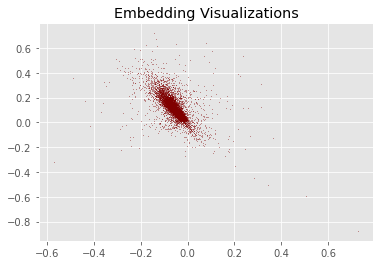

In [24]:
plt.clf()
fig=plt.figure(figsize=(6,4))
plt.scatter(
    x = emb_df.iloc[:,0],
    y = emb_df.iloc[:,1],
    s = 0.2,
    color = 'maroon',
    alpha = 0.5
)
plt.title('Embedding Visualizations')
plt.show()


### PCA Viz

In [25]:
pca = PCA(n_components=2, random_state=7)
pca_model = pca.fit_transform(emb_df)

In [26]:
emb_df_PCA = (
    pd.DataFrame(
        pca_model,
        columns=['x','y'],
        index = emb_df.index
    )
)

<Figure size 432x288 with 0 Axes>

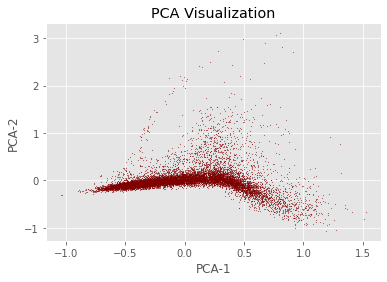

In [27]:
plt.clf()
fig = plt.figure(figsize=(6,4))

plt.scatter(
    x = emb_df_PCA['x'],
    y = emb_df_PCA['y'],
    s = 0.4,
    color = 'maroon',
    alpha = 0.5
)

plt.xlabel('PCA-1')
plt.ylabel('PCA-2')
plt.title('PCA Visualization')
plt.plot()
plt.show()